In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing

In [ ]:
# need to remove 8283, 8284 from dataset
data = pd.read_excel("data_insta.xlsx")

In [ ]:
data.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"DAY(0 MONDAY,6 SUNDAY)",...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2024-02-11 11:05:10,5,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2024-02-11 00:33:10,5,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,7,#tb#memories#greece#stous31dromous#newyork#200...,2024-02-09 15:51:47,3,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2024-02-08 18:21:57,2,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,4,#peru#lifelessons#tb#andreasgeorgiou✔️,2024-02-08 13:03:14,2,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,Unnamed: 34,Unnamed: 36
count,3.000000e+04,30000.000000,30000.000000,30000.000000,1,1.0
mean,4.608041e+04,1531.426900,1861.488033,28.993933,2017-04-24 16:11:40,1.0
min,1.182000e+04,0.000000,0.000000,0.000000,2017-04-24 16:11:40,1.0
25%,1.600600e+04,178.000000,301.000000,1.000000,2017-04-24 16:11:40,1.0
50%,2.310000e+04,559.000000,742.000000,4.000000,2017-04-24 16:11:40,1.0
75%,4.467800e+04,1565.000000,1816.000000,12.000000,2017-04-24 16:11:40,1.0
max,1.134619e+06,7918.000000,158338.000000,26011.000000,2017-04-24 16:11:40,1.0
std,8.745224e+04,2208.518135,4620.969066,365.380303,NaN,NaN


In [ ]:
data['TEXT'][4]

'The youngest hearts might be the oldest souls.... #lifelessons #andreasgeorgiou✔️ #tb #peru'

In [ ]:
emoji_regexp = u'[\U00002600-\U000026FF]|[\U00002700-\U000027BF]|[\U0001f300-\U0001f5fF]|[\U0001f600-\U0001f64F]|' \
               u'[\U0001f680-\U0001f6FF]|[\U00002A00-\U00002AFF]|[\U0001F1E0-\U0001F1FF]'
re.findall(emoji_regexp, data['TEXT'][4], re.UNICODE)

['✔']

In [ ]:
text = data['TEXT'][1706]
print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"
        u"\U00002A00-\U00002AFF"
        u"\U00002600-\U000026FF"
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀MΔΠUҒΔCTURΣR: Glock MΩDΣL: G26 Gen4CΔLIβΣR: 9 mm CΔPΔCITΨ: 10 Rounds βΔRRΣL LΣΠGTH: 3.4 ШΣIGHT: 615 gBy @charlotte_edc ?#guns#glock#arms#tactical#firearms#gunslove#selfdefense#photooftheday#9mm#igmilitia#instagood#photogun#firearmlove#glock26#firearms#gunpics#followme#firempotography#gunsdaly#selfdefense#gunporn#progun#handgun#armaswords#wordsguns
⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀MΔΠUҒΔCTURΣR: Glock MΩDΣL: G26 Gen4CΔLIβΣR: 9 mm CΔPΔCITΨ: 10 Rounds βΔRRΣL LΣΠGTH: 3.4 ШΣIGHT: 615 gBy @charlotte_edc ?#guns#glock#arms#tactical#firearms#gunslove#selfdefense#photooftheday#9mm#igmilitia#instagood#photogun#firearmlove#glock26#firearms#gunpics#followme#firempotography#gunsdaly#selfdefense#gunporn#progun#handgun#armaswords#wordsguns


# Post Description

In [ ]:
data['TEXT'][6666]

'That eyes which never give up you, is like a dream which cannot be real and later it comes true! ???@burakozcivit #Kemalsoydere #Oldphoto #karasevda'

In [ ]:
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      data['TEXT'][6666])

In [ ]:
letters_only

'That eyes which never give up you  is like a dream which cannot be real and later it comes true      burakozcivit  Kemalsoydere  Oldphoto  karasevda'

In [ ]:
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words
words

['that',
 'eyes',
 'which',
 'never',
 'give',
 'up',
 'you',
 'is',
 'like',
 'a',
 'dream',
 'which',
 'cannot',
 'be',
 'real',
 'and',
 'later',
 'it',
 'comes',
 'true',
 'burakozcivit',
 'kemalsoydere',
 'oldphoto',
 'karasevda']

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
words = [w for w in words if not w in stopwords.words("english")]
words

['eyes',
 'never',
 'give',
 'like',
 'dream',
 'cannot',
 'real',
 'later',
 'comes',
 'true',
 'burakozcivit',
 'kemalsoydere',
 'oldphoto',
 'karasevda']

In [ ]:
" ".join(words)

'eyes never give like dream cannot real later comes true burakozcivit kemalsoydere oldphoto karasevda'

In [ ]:
def cleanup(sentence):
    #letters_only = re.sub("[^a-zA-Z]", " ", sentence.split(', ')[0])
    #emojis = re.findall(emoji_regexp, sentence.split(', ')[0], re.UNICODE)
    try:
        letters_only = re.sub("[^a-zA-Z]", " ", sentence)
        emojis = re.findall(emoji_regexp, sentence, re.UNICODE)
    except:
        letters_only = ''
        emojis = []
    words = letters_only.lower().split()
    words = [w for w in words if not w in stopwords.words("english")]
    words = [w for w in words if len(w) > 1]
    return (" ".join(words)), (" ".join(emojis))

In [ ]:
sentence, emojis = cleanup(data['TEXT'][4])

In [ ]:
sentence

'youngest hearts might oldest souls lifelessons andreasgeorgiou tb peru'

In [ ]:
emojis

'✔'

In [ ]:
data['TEXT'].size

30000

In [ ]:
clean = []
clean_emojis = []
for i in range( 0, data['TEXT'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/30000*100))+"% done")
    x,y = cleanup(data['TEXT'][i])
    clean.append(x)
    clean_emojis.append(y)

3% done
7% done
10% done
13% done
17% done
20% done
23% done
27% done
30% done
33% done
37% done
40% done
43% done
47% done
50% done
53% done
57% done
60% done
63% done
67% done
70% done
73% done
77% done
80% done
83% done
87% done
90% done
93% done
97% done
100% done


In [ ]:
len(clean_emojis)

30000

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

clean_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 675)

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of
# strings.
clean_features = clean_vectorizer.fit_transform(clean)

#tfidf_transformer = TfidfTransformer()
#clean_features = tfidf_transformer.fit_transform(clean_features)

# Numpy arrays are easy to work with, so convert the result to an
# array
clean_features = clean_features.toarray()

In [ ]:
clean_features.shape

(30000, 675)

In [ ]:
vocab = clean_vectorizer.vocabulary_
print(vocab)

{'every': 139, 'day': 113, 'goodnight': 206, 'weekend': 654, 'tb': 591, 'greece': 211, 'memories': 364, 'people': 449, 'together': 608, 'mprousko': 380, 'love': 343, 'work': 664, 'saturday': 506, 'ever': 138, 'make': 353, 'happy': 248, 'quoteoftheday': 478, 'great': 209, 'family': 148, 'tv': 625, 'actor': 0, 'back': 43, 'cyprus': 108, 'ant': 28, 'photo': 452, 'creative': 100, 'sunday': 571, 'night': 414, 'music': 382, 'happiness': 247, 'freedom': 181, 'always': 14, 'friends': 185, 'backstage': 44, 'travel': 614, 'amsterdam': 16, 'europe': 136, 'athens': 38, 'high': 255, 'coming': 94, 'soon': 541, 'photoshoot': 457, 'best': 52, 'way': 650, 'start': 553, 'week': 653, 'smile': 540, 'world': 665, 'first': 167, 'photography': 454, 'big': 55, 'look': 340, 'like': 328, 'one': 427, 'eyes': 143, 'queen': 475, 'give': 194, 'bad': 45, 'official': 423, 'woman': 660, 'get': 189, 'women': 661, 'morning': 379, 'around': 34, 'us': 633, 'greek': 215, 'tonight': 609, 'goodmorning': 205, 'long': 339, 'ke

In [ ]:
new_vocab = []
for word in vocab:
    if len(word)>3:
        new_vocab.append(word)
#print (' '.join(new_vocab))
print (new_vocab)

['every', 'goodnight', 'weekend', 'greece', 'memories', 'people', 'together', 'mprousko', 'love', 'work', 'saturday', 'ever', 'make', 'happy', 'quoteoftheday', 'great', 'family', 'actor', 'back', 'cyprus', 'photo', 'creative', 'sunday', 'night', 'music', 'happiness', 'freedom', 'always', 'friends', 'backstage', 'travel', 'amsterdam', 'europe', 'athens', 'high', 'coming', 'soon', 'photoshoot', 'best', 'start', 'week', 'smile', 'world', 'first', 'photography', 'look', 'like', 'eyes', 'queen', 'give', 'official', 'woman', 'women', 'morning', 'around', 'greek', 'tonight', 'goodmorning', 'long', 'keep', 'heart', 'stay', 'part', 'blessed', 'need', 'blue', 'nature', 'ocean', 'instagood', 'photooftheday', 'beautiful', 'pretty', 'amazing', 'beauty', 'soul', 'team', 'wonderful', 'never', 'life', 'summer', 'beach', 'vacation', 'visitgreece', 'instagreece', 'holidays', 'picoftheday', 'greecestagram', 'hellas', 'island', 'photos', 'today', 'video', 'actress', 'share', 'sunset', 'tflers', 'pink', 'v

In [ ]:
clean_features = pd.DataFrame(data=clean_features, columns=vocab)
clean_features.head()

,every,day,goodnight,weekend,tb,greece,memories,people,together,mprousko,...,godly,ooniiichan,hokage,narvu,otakus,animee,animikkelart,sasukecosplays,crislia,voyjewellery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
j = clean_features.columns.get_level_values(0).isin(new_vocab)
clean_features = clean_features.loc[:,j]
clean_features.head()

,every,goodnight,weekend,greece,memories,people,together,mprousko,love,work,...,godly,ooniiichan,hokage,narvu,otakus,animee,animikkelart,sasukecosplays,crislia,voyjewellery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
clean_emojis_vectorizer = DictVectorizer()
#description_emojis_vectorizer = CountVectorizer()

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of
# strings.
#X = description_vectorizer.fit(emojis)
#clean_description_emojis_features = description_vectorizer.transform(clean_description_emojis)
X = clean_emojis_vectorizer.fit_transform(Counter(s.split()) for s in clean_emojis)

# Numpy arrays are easy to work with, so convert the result to an
# array
clean_emojis_features = X.toarray()

In [ ]:
clean_emojis_features.shape

(30000, 152)

In [ ]:
#create list of unique emojis
emojis = set()
for i in range (30000):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            emojis.add(emoji)
emojis = list(emojis)
test = np.zeros(shape=(30000,152))

#create sentence to vector
for i in range (30000):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            test[i][emojis.index(emoji)]+=1

#verify results
#x = 0
#for i in range (20740):
    #for j in range(808):
        #if test[i][j] > 0:
            #x+=1
#x

In [ ]:
test_emoji = np.zeros(shape=(1,152))
for i in range (30000):
    for j in range(152):
        if test[i][j] > 0:
            test_emoji[:,j]+=test[i][j]

In [ ]:
count = 0
count_list = []
for i in range(152):
    if test_emoji[:,i]>250:
        count+=1
        count_list.append(i)
count_list

[5, 9, 13, 17, 43, 51, 64, 78, 85, 101, 109, 115, 124, 129]

In [ ]:
clean_features_emoji = pd.DataFrame(data=test[:,count_list])
clean_features_emoji.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.154500,0.062633,0.099433,0.020367,0.020067,0.022233,0.047867,0.068467,0.336967,0.016000,0.041400,0.040567,0.013000,0.009133
std,0.655828,0.656042,1.762039,0.514160,0.175114,0.279061,0.550017,0.922862,8.599668,0.150149,0.480167,0.427622,0.176159,0.203923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,22.000000,12.000000,57.000000,13.000000,6.000000,11.000000,13.000000,14.000000,234.000000,11.000000,12.000000,16.000000,20.000000,8.000000


In [ ]:
emoji_set = set()
for i in range (30000):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            if emojis.index(emoji) in count_list:
                emoji_set.add(emoji)
print (' '.join(emoji_set))

✌ ❀ ♥ ✿ ✨ ✔ ☆ ❂ ✧ ⚋ ♡ ➖ ❤ ☀


# Hashtags

In [ ]:
#data['tags'][0][1:-1].split(', ')[23][2:-1]
data['LIST OF TAGS'][0]

'#newera#newday'

In [ ]:
sentence, emojis = cleanup(data['LIST OF TAGS'][0])

In [ ]:
sentence

'newera newday'

In [ ]:
emojis

''

In [ ]:
clean_tag = []
clean_tag_emojis = []
for i in range( 0, data['LIST OF TAGS'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/30000*100))+"% done")
    x,y = cleanup(data['LIST OF TAGS'][i])
    clean_tag.append(x)
    clean_tag_emojis.append(y)

3% done
7% done
10% done
13% done
17% done
20% done
23% done
27% done
30% done
33% done
37% done
40% done
43% done
47% done
50% done
53% done
57% done
60% done
63% done
67% done
70% done
73% done
77% done
80% done
83% done
87% done
90% done
93% done
97% done
100% done


In [ ]:
clean_tag[0:10]

['newera newday',
 'goodnight goodone weekend',
 'tb memories greece stous dromous newyork megatv',
 'mprousko filming',
 'peru lifelessons tb andreasgeorgiou',
 'love andreasgeorgiou',
 'work progress andreasgeorgiou',
 'dayout lovehim crazy godson',
 'andreasgeorgiou quoteoftheday',
 'actor onset newtvseries tv']

In [ ]:
clean_tag_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250)
clean_tag_features = clean_tag_vectorizer.fit_transform(clean_tag)
clean_tag_features = clean_tag_features.toarray()
clean_tag_features.shape

(30000, 250)

In [ ]:
vocab = clean_tag_vectorizer.get_feature_names_out()
print(vocab)

['actor' 'actress' 'adorable' 'alphatv' 'amazing'
 'amphictyonyofancientgreekcities' 'anime' 'animeboy' 'animegirl'
 'animelife' 'ant' 'aperolspritz' 'apisteuta' 'art' 'athens'
 'babylonstepback' 'backstage' 'bansko' 'bblogger' 'beautiful' 'beauty'
 'bestoftheday' 'bikini' 'black' 'blogger' 'blogwithme' 'brigitte' 'burak'
 'burakozcivit' 'celebrity' 'celestino' 'chalkidiki' 'contentcreator'
 'createcontent' 'creative' 'cute' 'cyprus' 'dailybadass' 'denizsoydere'
 'donttreadonme' 'dress' 'dromos' 'easter' 'ellada' 'europe'
 'everybladeofgrass' 'fab' 'fabulous' 'fact' 'facts' 'family' 'fashion'
 'fashionblogger' 'fashionexpert' 'fashionista' 'firearmlove' 'firearms'
 'fitness' 'fitnessmodel' 'flowers' 'follow' 'followforfollow' 'followme'
 'food' 'footwear' 'friends' 'fun' 'funny' 'getinspired' 'girl'
 'girloftheday' 'glock' 'goals' 'good' 'gr' 'greece' 'greek'
 'greekblogger' 'greekgirl' 'greeklife' 'greekpost' 'greekposts'
 'greekquote' 'greekquoteoftheday' 'greekquotes' 'greekquotesg'

In [ ]:
clean_tag_features = pd.DataFrame(data=clean_tag_features, columns=vocab)
clean_tag_features.head()

,actor,actress,adorable,alphatv,amazing,amphictyonyofancientgreekcities,anime,animeboy,animegirl,animelife,...,webstagram,women,wordporn,words,wordsguns,wordswithmeaning,wu,xfactorgr,yfsf,zcivit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# XGBoost

In [ ]:
#dataset1 = np.hstack((clean_places_features,clean_mentions_features,clean_tag_features,clean_user_features,clean_features, clean_name_features))
dataset1 = np.hstack((clean_features, clean_features_emoji))
#dataset1 = np.hstack((clean_name_features))
dataset2 = np.hstack((data['FOLLOWERS'].to_numpy().reshape(30000,1), data['FOLLOWING'].to_numpy().reshape(30000,1)))

In [ ]:
dataset1.shape

(30000, 616)

In [ ]:
dataset = np.hstack((dataset1,dataset2))
#dataset = np.hstack((clean_features,dataset2))

In [ ]:
dataset.shape

(30000, 618)

In [ ]:
pd.concat([clean_features, clean_features_emoji], axis=1).to_csv('NLP_feature_new.csv')

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset, np.ravel(data.LIKES), test_size=0.2, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(clean_features, np.ravel(data.LIKES), test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
model_xgb = xgb.XGBRegressor(max_depth=3, learning_rate=0.48, n_estimators=361)
#model_xgb = xgb.XGBRegressor(max_depth=3, learning_rate=0.005, n_estimators=1000)
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(RMSE)

1901.5148226901777


In [ ]:
model_xgb.score(x_test,y_test)

0.8301931878934051

500 post + emoji > 175: 4406.41621941

500 post + emoji > 200: 4401.21741895

500 post + emoji > 250: 4390.61582903

500 post + emoji > 275: 4390.61582903

500 post + emoji > 400: 4399.59154944

400 post + emoji > 250: 4400.99444182

600 post + emoji > 250: 4296.32618265

700 post + emoji > 250: 4225.89985807, 1547.05872173

675 post + emoji > 250: 1543.21789075

500 Hashtags + 250 post:

500 Hashtags + 500 post:

250 Hashtags + 500 post:

500 post: 4407.20005375

750 post:

In [ ]:
data.describe()

,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,Unnamed: 34,Unnamed: 36
count,3.000000e+04,30000.000000,30000.000000,30000.000000,1,1.0
mean,4.608041e+04,1531.426900,1861.488033,28.993933,2017-04-24 16:11:40,1.0
min,1.182000e+04,0.000000,0.000000,0.000000,2017-04-24 16:11:40,1.0
25%,1.600600e+04,178.000000,301.000000,1.000000,2017-04-24 16:11:40,1.0
50%,2.310000e+04,559.000000,742.000000,4.000000,2017-04-24 16:11:40,1.0
75%,4.467800e+04,1565.000000,1816.000000,12.000000,2017-04-24 16:11:40,1.0
max,1.134619e+06,7918.000000,158338.000000,26011.000000,2017-04-24 16:11:40,1.0
std,8.745224e+04,2208.518135,4620.969066,365.380303,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt

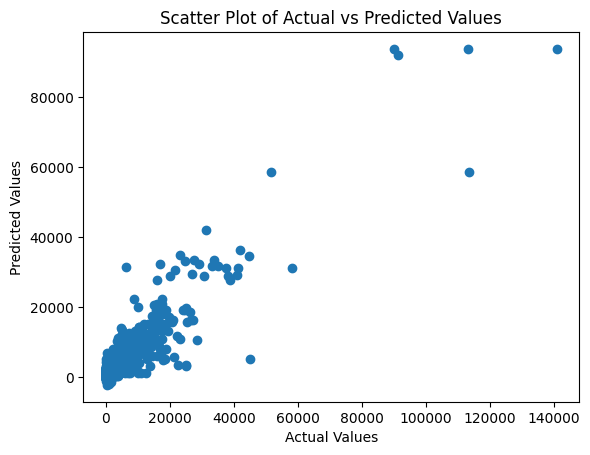

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [ ]:
# prompt: plt.scatter(y_test, y_pred)
# plt.show()
# plot olumns and row

# Plot the scatter plot
plt.scatter(y_test, y_pred)

# Set the title and axis labels
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Show the plot
plt.show()

# Print the correlation matrix
print(data.corr())


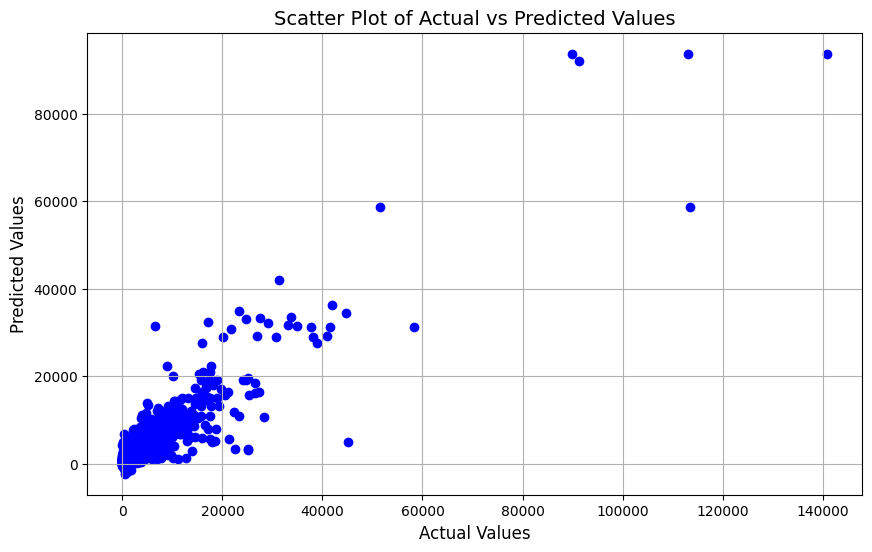

In [74]:
# prompt: plot ytest and y pred graph with columns and row name

import matplotlib.pyplot as plt

# Create a DataFrame with the actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Set the index of the DataFrame
df.index.name = 'Index'

# Plot the scatter plot with columns and row names
plt.figure(figsize=(10, 6))
plt.scatter(df['Actual'], df['Predicted'], c='blue', marker='o')

# Add labels and title
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Scatter Plot of Actual vs Predicted Values', fontsize=14)

# Add grid and show plot
plt.grid(True)
plt.show()


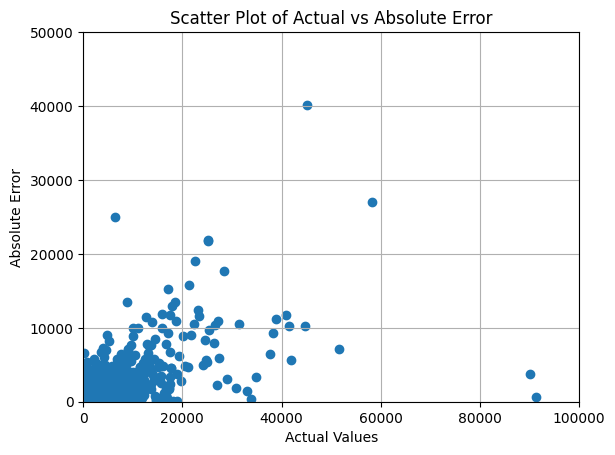

In [75]:
# prompt: fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.scatter(y_test, abs(y_pred-y_test))
# plot col and ros

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the data points
ax.scatter(y_test, abs(y_pred-y_test))

# Set the title and axis labels
ax.set_title("Scatter Plot of Actual vs Absolute Error")
ax.set_xlabel("Actual Values")
ax.set_ylabel("Absolute Error")

# Set the limits of the x and y axes
ax.set_xlim(0, 100000)
ax.set_ylim(0, 50000)

# Add grid lines
ax.grid(True)

# Show the plot
plt.show()


In [ ]:
# prompt: test the model with example

y_pred = model_xgb.predict(x_test[0].reshape(1,-1))
print(y_pred)


[2230.2769]


In [ ]:
# prompt: save the model in a h5 file

model_xgb.save_model('xgb_model.h5')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:21:39] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [ ]:
# prompt: feature importance

importances = model_xgb.feature_importances_
for i, importance in enumerate(importances):
    print(f"Feature {i+1}: {importance}")


Feature 1: 0.00019261386478319764
Feature 2: 0.0
Feature 3: 1.8014183297054842e-05
Feature 4: 0.0
Feature 5: 0.0
Feature 6: 8.039810199989006e-05
Feature 7: 0.0
Feature 8: 0.00019001842883881181
Feature 9: 0.0
Feature 10: 0.0
Feature 11: 0.0008585267933085561
Feature 12: 0.0004428093379829079
Feature 13: 3.558236130629666e-05
Feature 14: 0.0001849713735282421
Feature 15: 0.0001241387362824753
Feature 16: 0.0
Feature 17: 5.945395605522208e-05
Feature 18: 0.0
Feature 19: 0.0
Feature 20: 0.0046585979871451855
Feature 21: 0.0
Feature 22: 0.0023617283441126347
Feature 23: 0.0
Feature 24: 0.0
Feature 25: 0.0016402319306507707
Feature 26: 0.013504574075341225
Feature 27: 0.0
Feature 28: 0.0007006014930084348
Feature 29: 0.00021735562768299133
Feature 30: 0.0008241850882768631
Feature 31: 0.00015400975826196373
Feature 32: 0.0015668633859604597
Feature 33: 0.0012730000307783484
Feature 34: 4.771840031025931e-05
Feature 35: 0.0007692604558542371
Feature 36: 0.01102969516068697
Feature 37: 0.000

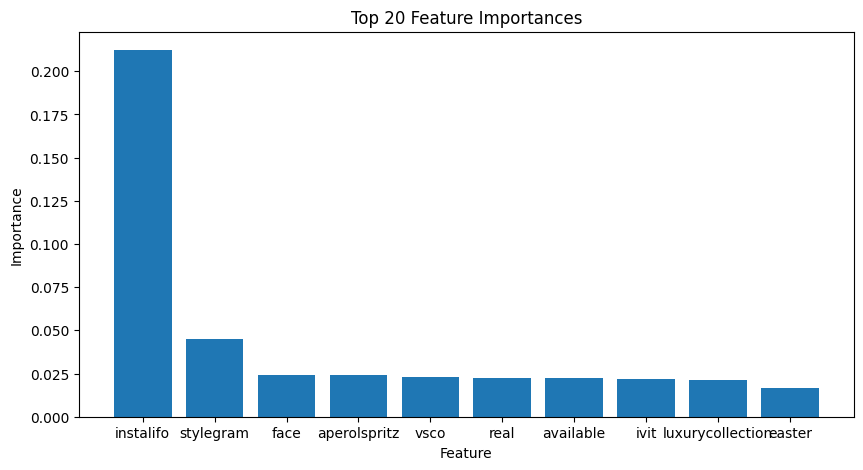

In [ ]:
# prompt: plot feature importance 20 columns

importances = model_xgb.feature_importances_
top_20_features = sorted(zip(importances, clean_features.columns), reverse=True)[:10]
x_val = [x[0] for x in top_20_features]
y_val = [x[1] for x in top_20_features]
plt.figure(figsize=(10, 5))
plt.bar(y_val, x_val)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 20 Feature Importances")
plt.show()


In [ ]:
# prompt: print the num of text vectorizer feature , emoji feature, and additional feature

num_text_vectorizer_features = len(clean_features.columns)
num_emoji_features = len(clean_features_emoji.columns)
num_additional_features = dataset.shape[1] - num_text_vectorizer_features - num_emoji_features
print("Number of text vectorizer features:", num_text_vectorizer_features)
print("Number of emoji features:", num_emoji_features)
print("Number of additional features:", num_additional_features)


Number of text vectorizer features: 602
Number of emoji features: 14
Number of additional features: 2


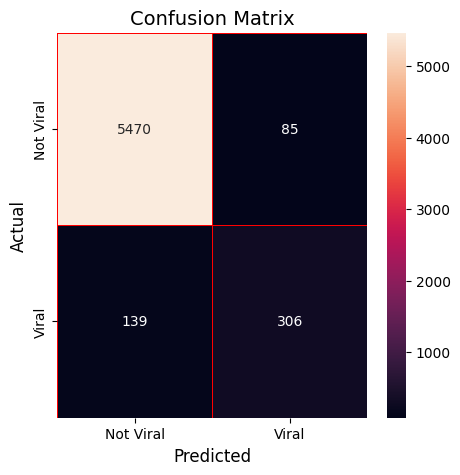

In [ ]:
# prompt: confusion matrix plot

from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns # Import the seaborn library

# Get the predicted labels for the test data
y_pred = model_xgb.predict(x_test)

# Binarize the predicted labels
y_pred_bin = (y_pred > 5000).astype(int)

# Get the actual labels for the test data
y_test_bin = (y_test > 5000).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test_bin, y_pred_bin)

# Define the labels for the confusion matrix
labels = ['Not Viral', 'Viral']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.6, linecolor="r", fmt=".0f", ax=ax) # Now sns is defined

# Label the axes and title
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_title('Confusion Matrix', fontsize=14)
plt.show()

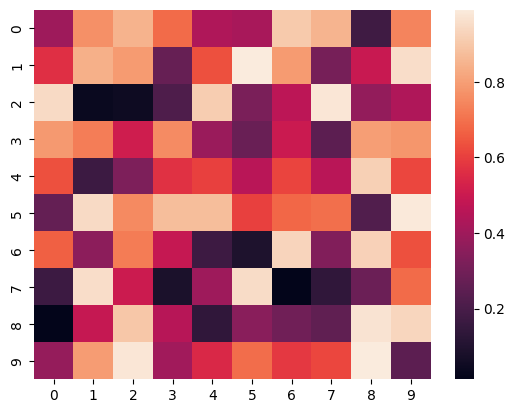

In [77]:
# prompt: heatmap plot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate some random data
data = np.random.rand(10, 10)

# Create a heatmap
sns.heatmap(data)

# Show the plot
plt.show()


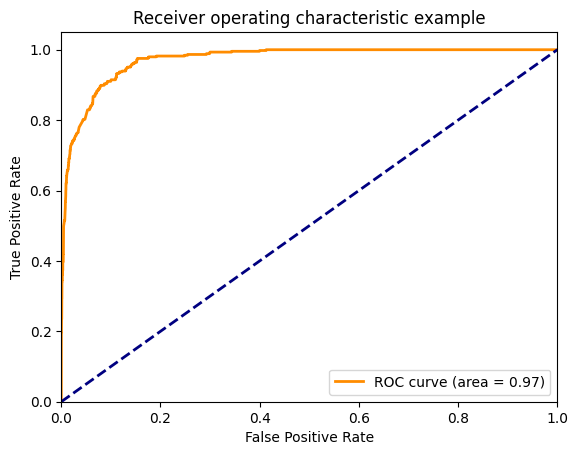

In [ ]:
# prompt: ROC Curve and AUC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted values for the test data
y_pred = model_xgb.predict(x_test)

# Binarize the target variable (assuming a threshold of 5000 for virality)
y_test_bin = (y_test > 5000).astype(int)

# Now calculate ROC curve with the binarized target
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

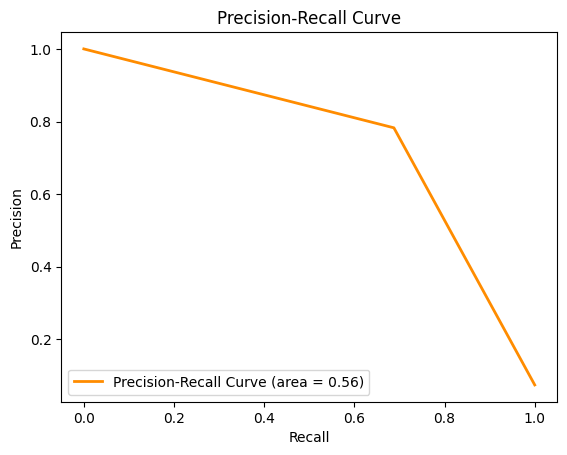

In [ ]:
# prompt: Precision-Recall Curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Get the predicted values for the test data (no probabilities for regression)
y_pred = model_xgb.predict(x_test)

# Assuming you want to evaluate based on whether the prediction
# is above or below a certain threshold (e.g., 5000)
y_pred_bin = (y_pred > 5000).astype(int)

# Calculate precision and recall values (using the binarized predictions)
precision, recall, thresholds = precision_recall_curve(y_test_bin, y_pred_bin)

# Calculate average precision score
average_precision = average_precision_score(y_test_bin, y_pred_bin)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import joblib

# Sample post
post = "This is a new post with some emojis 😊😊😊 and some hashtags #instagood #photooftheday #fashion #beautiful #happy #cute #tbt #followme #likeforlike 😊😊😊"
followers = 100000
following = 102

# Assuming you have some predefined training data to fit the vectorizer and emoji encoder
# For simplicity, we will fit them on the sample post only.
# In practice, you should fit them on your training dataset.

# Fit a text vectorizer
vectorizer = CountVectorizer()
sample_texts = [post]
vectorizer.fit(sample_texts)
text_features = vectorizer.transform([post]).toarray()

# Manually handle emoji encoding for this example
emojis = re.findall(r'[^\w\s,]', post)
unique_emojis = list(set(emojis))  # Unique emojis in the dataset
emoji_encoder = OneHotEncoder(categories=[unique_emojis], handle_unknown='ignore')

# Ensure emojis are correctly shaped for encoding
emoji_features = emoji_encoder.fit_transform(np.array(emojis).reshape(-1, 1)).toarray().sum(axis=0).reshape(1, -1)

# Extract additional features
hashtags = re.findall(r'#[A-Za-z0-9_]+', post)
num_hashtags = len(hashtags)
post_length = len(post)

additional_features = np.array([[num_hashtags, post_length, followers, following]])

# Combine all features
features = np.hstack([text_features, emoji_features, additional_features])

# Load the trained XGBoost model
model = xgb.Booster()
model.load_model('xgb_model.h5')

# Convert features to DMatrix for XGBoost
dmat = xgb.DMatrix(features)

# Predict the number of likes
predicted_likes = model.predict(dmat)
print(f"Predicted number of likes: {predicted_likes[0]}")


Predicted number of likes: 165590.890625


In [ ]:
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import joblib

# Sample post
post = "Excited about the weekend! 🌟🌟🌟 Don't forget to smile! #weekendvibes #happiness #smilemore #positivevibes #goodtimes #blessed 🌟🌟🌟"
followers = 150000
following = 10

# Assuming you have some predefined training data to fit the vectorizer and emoji encoder
# For simplicity, we will fit them on the sample post only.
# In practice, you should fit them on your training dataset.

# Fit a text vectorizer
vectorizer = CountVectorizer()
sample_texts = [post]
vectorizer.fit(sample_texts)
text_features = vectorizer.transform([post]).toarray()

# Manually handle emoji encoding for this example
emojis = re.findall(r'[^\w\s,]', post)
unique_emojis = list(set(emojis))  # Unique emojis in the dataset
emoji_encoder = OneHotEncoder(categories=[unique_emojis], handle_unknown='ignore')

# Ensure emojis are correctly shaped for encoding
emoji_features = emoji_encoder.fit_transform(np.array(emojis).reshape(-1, 1)).toarray().sum(axis=0).reshape(1, -1)

# Extract additional features
hashtags = re.findall(r'#[A-Za-z0-9_]+', post)
num_hashtags = len(hashtags)
post_length = len(post)

additional_features = np.array([[num_hashtags, post_length, followers, following]])

# Combine all features
features = np.hstack([text_features, emoji_features, additional_features])

# Load the trained XGBoost model
model = xgb.Booster()
model.load_model('xgb_model.h5')

# Convert features to DMatrix for XGBoost
dmat = xgb.DMatrix(features)

# Predict the number of likes
predicted_likes = model.predict(dmat)
print(f"Predicted number of likes: {predicted_likes[0]}")


Predicted number of likes: 165385.546875
